## **Load Data**

In [1]:
import pandas 

data= pandas.read_csv('1000dataset.csv')

In [73]:
import numpy as np

## **Data Preprocessing**

In [2]:
data.head()

,Person,Therapy,Disorder,Self-harm thoughts,Post-traumatic disorder,Communication problems,Relationship problems,Alcohol,Nightmare,Dental issues,Hair loss
0,Person 1,Family Therapy,PTSD,No,No,No,No,Yes,Yes,Yes,No
1,Person 2,Exposure Therapy,Self-Harm,Yes,No,No,No,Yes,Yes,Yes,No
2,Person 3,DBT,Substance Abuse,No,Yes,No,No,Yes,No,Yes,Yes
3,Person 4,Interpersonal Therapy,Substance Abuse,No,Yes,Yes,No,No,Yes,No,Yes
4,Person 5,Family Therapy,Substance Abuse,Yes,Yes,No,No,No,No,Yes,No


In [3]:
data= data.drop(columns="Person")

In [4]:
data['Self-harm thoughts']=data['Self-harm thoughts'].apply(lambda x:1 if 'Yes' in x else 0)
data['Post-traumatic disorder']=data['Post-traumatic disorder'].apply(lambda x:1 if 'Yes' in x else 0)
data['Communication problems']=data['Communication problems'].apply(lambda x:1 if 'Yes' in x else 0)
data['Relationship problems']=data['Relationship problems'].apply(lambda x:1 if 'Yes' in x else 0)
data['Alcohol']=data['Alcohol'].apply(lambda x:1 if 'Yes' in x else 0)
data['Nightmare']=data['Nightmare'].apply(lambda x:1 if 'Yes' in x else 0)
data['Dental issues']=data['Dental issues'].apply(lambda x:1 if 'Yes' in x else 0)
data['Hair loss']=data['Hair loss'].apply(lambda x:1 if 'Yes' in x else 0)

In [5]:
data=pandas.get_dummies(data)

In [6]:
data.head()

,Self-harm thoughts,Post-traumatic disorder,Communication problems,Relationship problems,Alcohol,Nightmare,Dental issues,Hair loss,Therapy_CBT,Therapy_DBT,Therapy_Exposure Therapy,Therapy_Family Therapy,Therapy_Interpersonal Therapy,Disorder_Anxiety,Disorder_Depression,Disorder_PTSD,Disorder_Self-Harm,Disorder_Substance Abuse
0,0,0,0,0,1,1,1,0,False,False,False,True,False,False,False,True,False,False
1,1,0,0,0,1,1,1,0,False,False,True,False,False,False,False,False,True,False
2,0,1,0,0,1,0,1,1,False,True,False,False,False,False,False,False,False,True
3,0,1,1,0,0,1,0,1,False,False,False,False,True,False,False,False,False,True
4,1,1,0,0,0,0,1,0,False,False,False,True,False,False,False,False,False,True


## **Test / Train Split**

In [9]:
columns_to_drop = ['Therapy_CBT', 'Therapy_DBT','Therapy_Exposure Therapy','Therapy_Family Therapy', 'Therapy_Interpersonal Therapy']
x = data.drop(columns=columns_to_drop)

In [10]:
y = data[columns_to_drop]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [12]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_train.astype('float32')
y_test = y_train.astype('float32')

In [64]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## **Model Building**

In [65]:
batch_size= 10
epochs = 60

In [66]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(13))
x= tf.keras.layers.Dense(680,activation='relu')(inputs)
x= tf.keras.layers.Dense(340,activation='relu')(x)
x= tf.keras.layers.Dense(170,activation='relu')(x)
outputs= tf.keras.layers.Dense(5,activation='sigmoid')(x)

model = tf.keras.Model(inputs,outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy',tf.keras.metrics.AUC(name='auc')]    
)


history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs= epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
    )

Epoch 1/60
60/60 [==============================] - 4s 30ms/step - loss: 0.5223 - accuracy: 0.1883 - auc: 0.4805 - val_loss: 0.5008 - val_accuracy: 0.1667 - val_auc: 0.5327 - lr: 0.0010
Epoch 2/60
60/60 [==============================] - 1s 14ms/step - loss: 0.4990 - accuracy: 0.2133 - auc: 0.5495 - val_loss: 0.5073 - val_accuracy: 0.2000 - val_auc: 0.4830 - lr: 0.0010
Epoch 3/60
60/60 [==============================] - 1s 14ms/step - loss: 0.4917 - accuracy: 0.3067 - auc: 0.5988 - val_loss: 0.5197 - val_accuracy: 0.1800 - val_auc: 0.4916 - lr: 0.0010
Epoch 4/60
60/60 [==============================] - 1s 15ms/step - loss: 0.4831 - accuracy: 0.2983 - auc: 0.6290 - val_loss: 0.5190 - val_accuracy: 0.1933 - val_auc: 0.5044 - lr: 0.0010
Epoch 5/60
60/60 [==============================] - 1s 13ms/step - loss: 0.4730 - accuracy: 0.3517 - auc: 0.6623 - val_loss: 0.5275 - val_accuracy: 0.1600 - val_auc: 0.4826 - lr: 0.0010
Epoch 6/60
60/60 [==============================] - 1s 14ms/step - los

## **Evaluation**

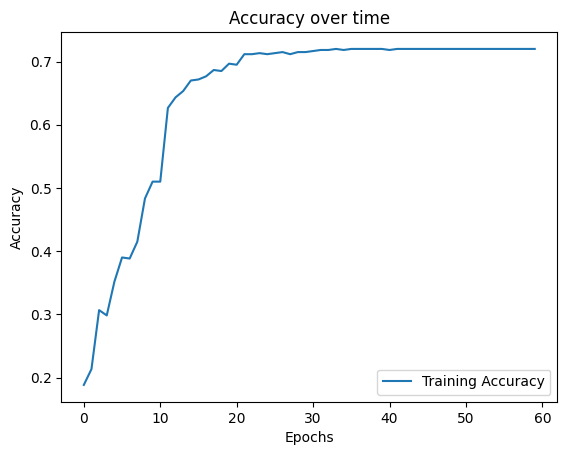

In [83]:
import matplotlib.pyplot as plt

plt.plot(range(epochs),history.history['accuracy'],label='Training Accuracy')
#plt.plot(range(epochs),history.history['val_accuracy'],label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over time')
plt.show()

## **Save Model**

In [37]:
import pickle

with open("new.pkl", "wb") as file:
    pickle.dump(model, file)

## **Prediction**

In [105]:
print("Inputs :")
input = x_test[0]
print(input)
print("Expected output :")
array= y_test[0]
output= np.argmax(array)
print(columns_to_drop[output])
print("Prediction :")
pred = model.predict(x_test[[0]])
max_indices = np.argmax(pred)
print(columns_to_drop[max_indices])

Inputs :
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Expected output :
Therapy_Family Therapy
Prediction :
1/1 [==============================] - 0s 67ms/step
Therapy_Family Therapy
